# Set up

In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# import os
# # TODO: change this to the path to your homework folder
# #GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'MultiTaskLearning'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'codes/MultiTaskLearning'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

# # Load the autoreload extension
# %load_ext autoreload
# %autoreload 2

# import sys
# sys.path.append(GOOGLE_DRIVE_PATH)

In [5]:
import torch


# Run the codes

In [14]:
from dataset import *
from model.Multitask import *
from model.binary import *
from train_binary import *
from torch.utils.data import DataLoader

Load the data

In [8]:
df_train = maketable(".", "train")
df_valid = maketable(".", "dev")  # validation
df_test = maketable(".", "test") 
# df_train['name']

In [ ]:
df_train

,Participant_ID,Utterance_ID,text_PATH,audio_PATH,PHQ_Binary,PHQ_Score
0,303,0,./Features/BERT/sentence_embeddingnew/303_sent...,./Features/Audio/Opensmile_eGeMAPSv02/303_eGeM...,0,0
1,303,1,./Features/BERT/sentence_embeddingnew/303_sent...,./Features/Audio/Opensmile_eGeMAPSv02/303_eGeM...,0,0
2,303,2,./Features/BERT/sentence_embeddingnew/303_sent...,./Features/Audio/Opensmile_eGeMAPSv02/303_eGeM...,0,0
3,303,3,./Features/BERT/sentence_embeddingnew/303_sent...,./Features/Audio/Opensmile_eGeMAPSv02/303_eGeM...,0,0
4,303,4,./Features/BERT/sentence_embeddingnew/303_sent...,./Features/Audio/Opensmile_eGeMAPSv02/303_eGeM...,0,0
...,...,...,...,...,...,...
4201,702,81,./Features/BERT/sentence_embeddingnew/702_sent...,./Features/Audio/Opensmile_eGeMAPSv02/702_eGeM...,0,0
4202,702,82,./Features/BERT/sentence_embeddingnew/702_sent...,./Features/Audio/Opensmile_eGeMAPSv02/702_eGeM...,0,0
4203,702,83,./Features/BERT/sentence_embeddingnew/702_sent...,./Features/Audio/Opensmile_eGeMAPSv02/702_eGeM...,0,0
4204,702,84,./Features/BERT/sentence_embeddingnew/702_sent...,./Features/Audio/Opensmile_eGeMAPSv02/702_eGeM...,0,0


In [9]:
train_ds = MultiTaskDataset(df_train, "both")
valid_ds = MultiTaskDataset(df_valid, "both")
test_ds = MultiTaskDataset(df_test,"both")
train_dl = DataLoader(train_ds, batch_size=200, shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=50, shuffle=True, num_workers=2)
test_dl = DataLoader(test_ds, batch_size=10, shuffle=True, num_workers=2)

Train the model

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [11]:
class_weights = get_class_stats(df_train)
class_weights

(tensor([2148., 2058.]),
 tensor([2030.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,  351.,  471.,  308.,  259.,
          262.,   88.,  319.,  118.]))

Binary Model

In [12]:
model_binary = BinaryModel( ps = 0.1)
model_binary

BinaryModel(
  (fc1): Linear(in_features=472, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=64, bias=True)
  (relu1): ReLU()
  (fcL1): Linear(in_features=64, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)

In [15]:
from train_binary import *

model_binary.to(device)
optim_binary = get_optimizer(model_binary, lr=1e-4, weight_decay=1e-4)
best_model, stats_binary = train_model_binary(model_binary, train_dl, valid_dl, optim_binary, class_weights[0],
                                num_epoch=5, collect_cycle=1, device=device)

------------------------ Start Training ------------------------


RuntimeError: The size of tensor a (200) must match the size of tensor b (2) at non-singleton dimension 1

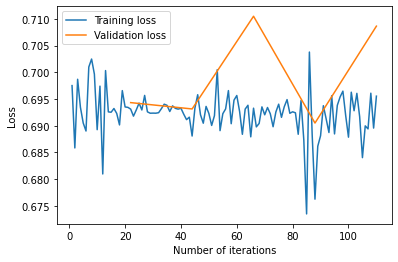

In [ ]:
plot_loss(stats_binary)

Multitask Model

In [ ]:
model = MultiTaskModel(ps = 0.1)
model

MultiTaskModel(
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.25, inplace=False)
  (fcL1): Linear(in_features=512, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=768, out_features=512, bias=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.25, inplace=False)
  (fcL2): Linear(in_features=512, out_features=25, bias=True)
)